## Importing libraries

In [2]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Markdown
import numpy as np
import seaborn as sns

## Importing tables

In [3]:
url = "../Data/immigration/immigration_citizenship.csv"
table = pd.read_csv(url)
display(table.head())

C:\Users\askov\AppData\Local\Temp\ipykernel_24808\4241968456.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  table = pd.read_csv(url)


,age,agedef,birth_country,sex,Country,ISO3,1998,1999,2000,2001,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,TOTAL,COMPLET,FOR_STLS,F,Austria,AUT,28638.0,35797.0,NaN,34825.0,...,48788.0,65441.0,55097.0,48739.0,45444.0,46329.0,42715.0,46214.0,97378.0,64503.0
1,TOTAL,COMPLET,FOR_STLS,F,Belgium,BEL,29382.0,33021.0,31296.0,39605.0,...,51236.0,56379.0,50222.0,51820.0,55655.0,59833.0,47172.0,55678.0,93814.0,71027.0
2,TOTAL,COMPLET,FOR_STLS,F,Bulgaria,BGR,NaN,NaN,NaN,NaN,...,7295.0,6276.0,5522.0,5844.0,5960.0,6588.0,6190.0,6852.0,8357.0,18085.0
3,TOTAL,COMPLET,FOR_STLS,F,Switzerland,CHE,36508.0,NaN,42245.0,NaN,...,62616.0,61336.0,59968.0,57238.0,57673.0,57407.0,53380.0,57705.0,66610.0,117356.0
4,TOTAL,COMPLET,FOR_STLS,F,Cyprus,CYP,NaN,NaN,NaN,NaN,...,5630.0,7362.0,7437.0,9498.0,10230.0,11953.0,12580.0,11222.0,15632.0,19850.0


## Migration pyramid for age groups

Error processing Austria: 'float' object is not iterable
Error processing Belgium: 'float' object is not iterable
Error processing Bulgaria: 'float' object is not iterable
Error processing Switzerland: 'float' object is not iterable
Error processing Cyprus: 'float' object is not iterable
Error processing Czechia: 'float' object is not iterable
Error processing Germany: 'float' object is not iterable
Error processing Denmark: 'float' object is not iterable
Error processing Estonia: 'float' object is not iterable
Error processing Spain: 'float' object is not iterable
Error processing Finland: 'float' object is not iterable
Error processing France: 'float' object is not iterable
Error processing Georgia: 'float' object is not iterable
Error processing Croatia: 'float' object is not iterable
Error processing Hungary: 'float' object is not iterable
Error processing Ireland: 'float' object is not iterable
Error processing Iceland: 'float' object is not iterable
Error processing Italy: 'float

C:\Users\askov\AppData\Local\Temp\ipykernel_24808\2806659459.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 8))


Error processing Luxembourg: 'float' object is not iterable
Error processing Latvia: 'float' object is not iterable
Error processing Moldova, Republic of: 'float' object is not iterable
Error processing Montenegro: 'float' object is not iterable
Error processing North Macedonia: 'float' object is not iterable
Error processing Malta: 'float' object is not iterable
Error processing Netherlands: 'float' object is not iterable
Error processing Norway: 'float' object is not iterable
Error processing Poland: 'float' object is not iterable
Error processing Portugal: 'float' object is not iterable
Error processing Romania: 'float' object is not iterable
Error processing Sweden: 'float' object is not iterable
Error processing Slovenia: 'float' object is not iterable
Error processing Slovakia: 'float' object is not iterable
Error processing Turkey: 'float' object is not iterable
Error processing Kyrgyzstan: 'float' object is not iterable
Error processing Russian Federation: 'float' object is not

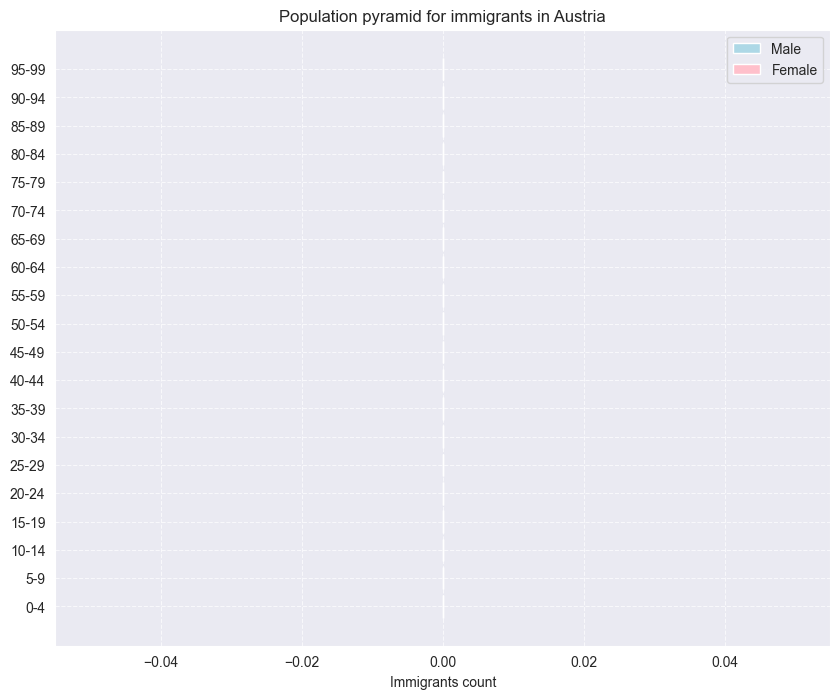

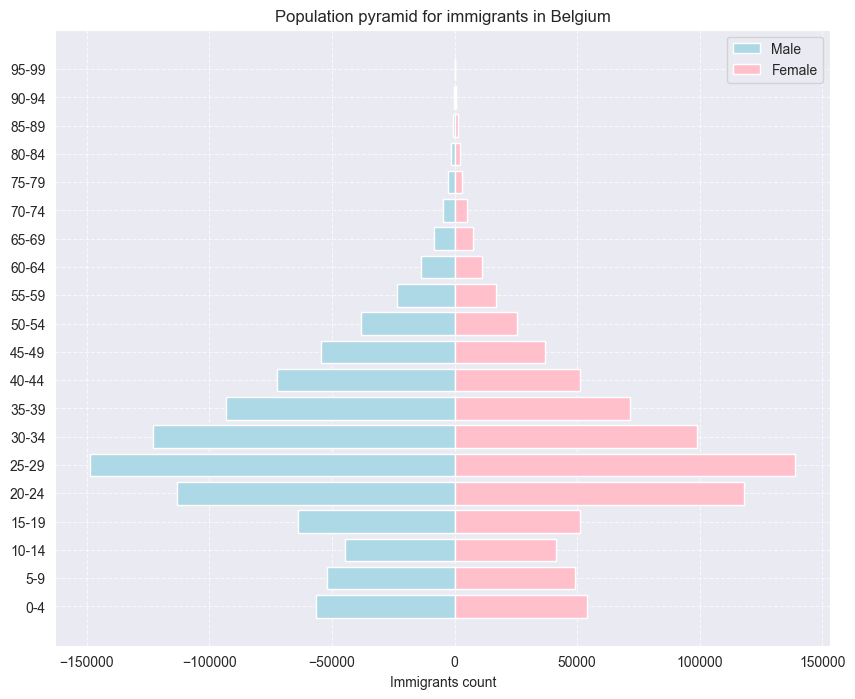

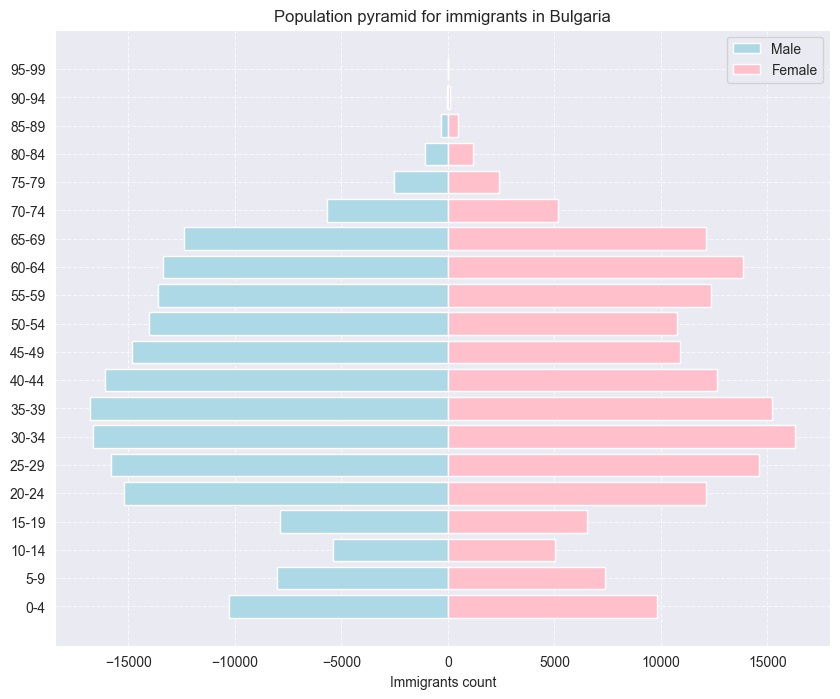

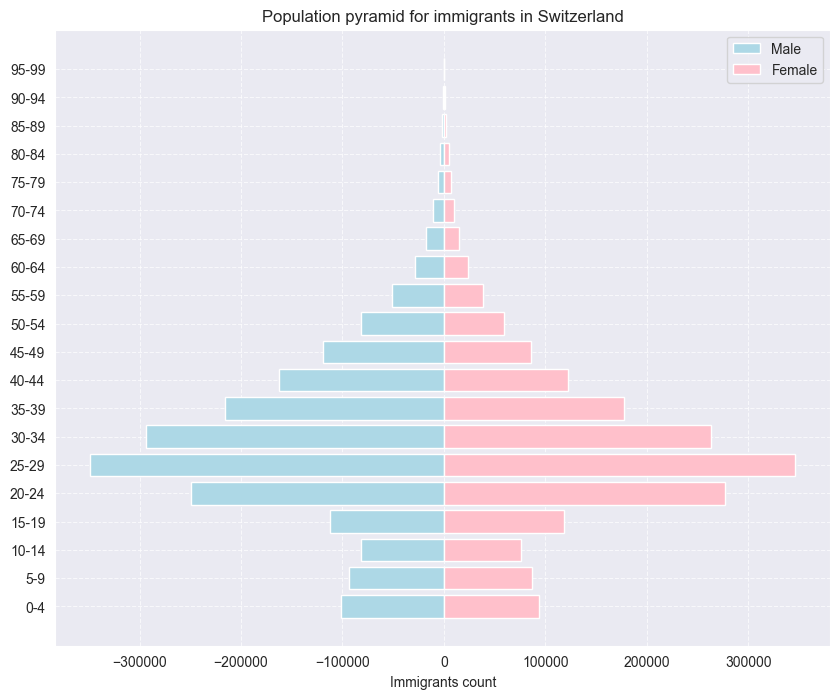

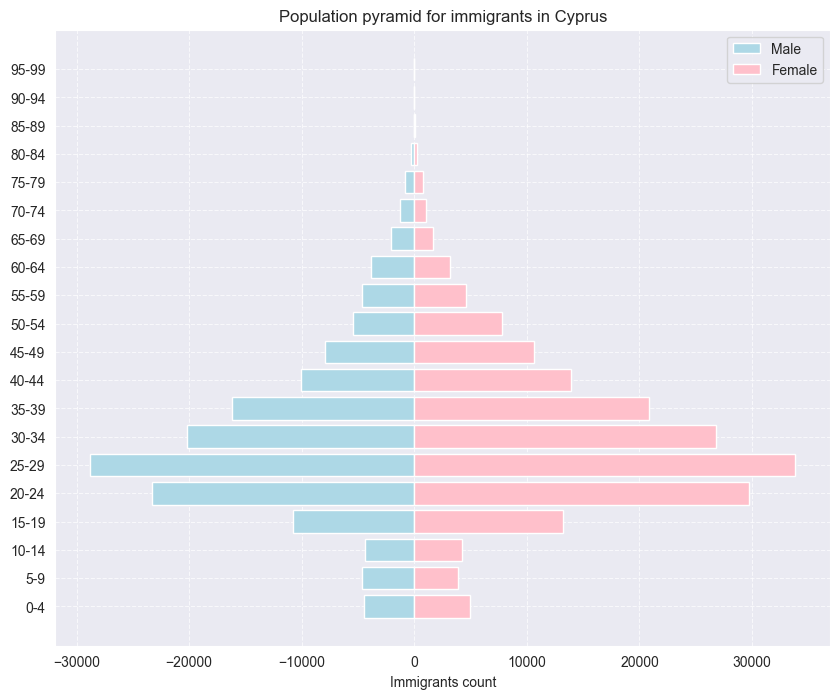

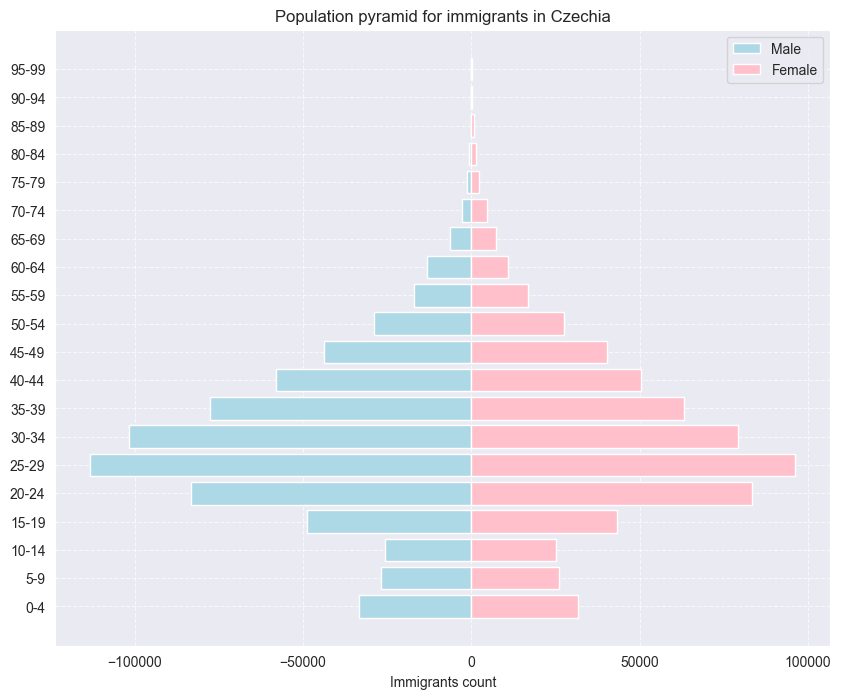

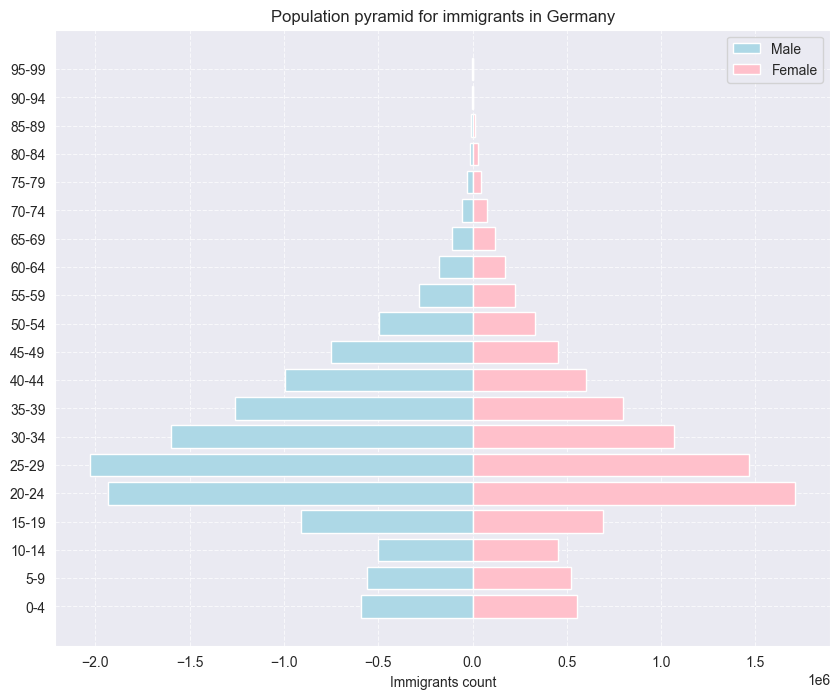

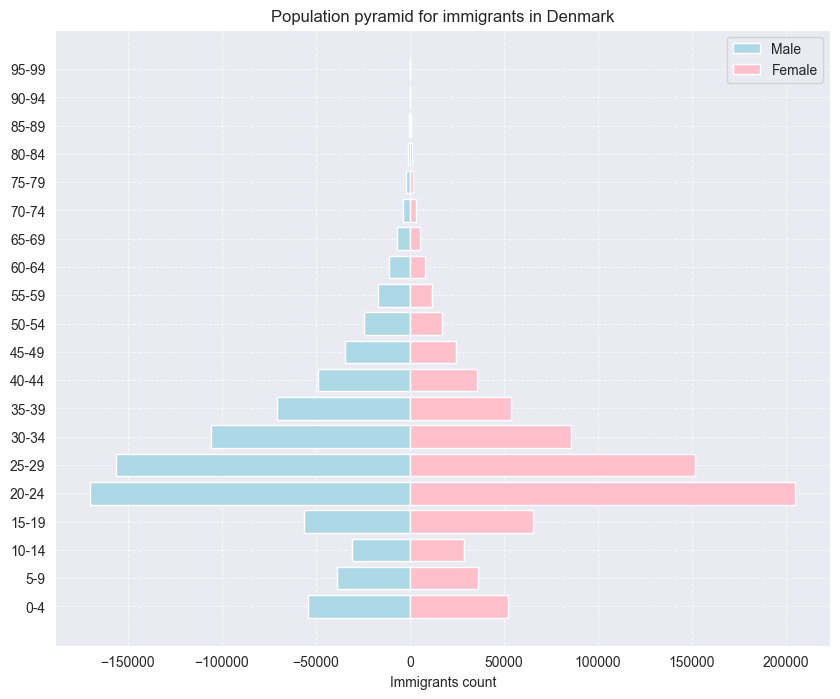

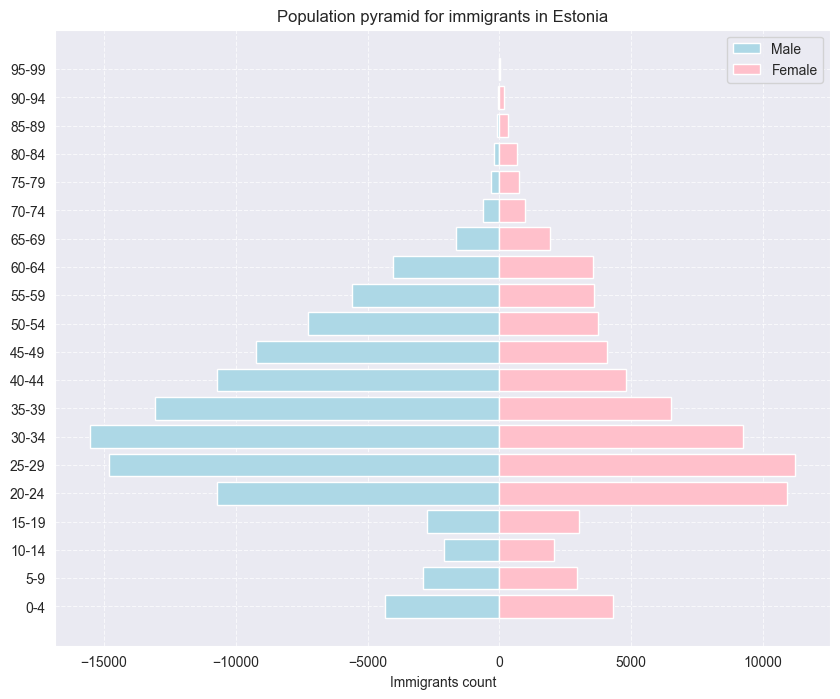

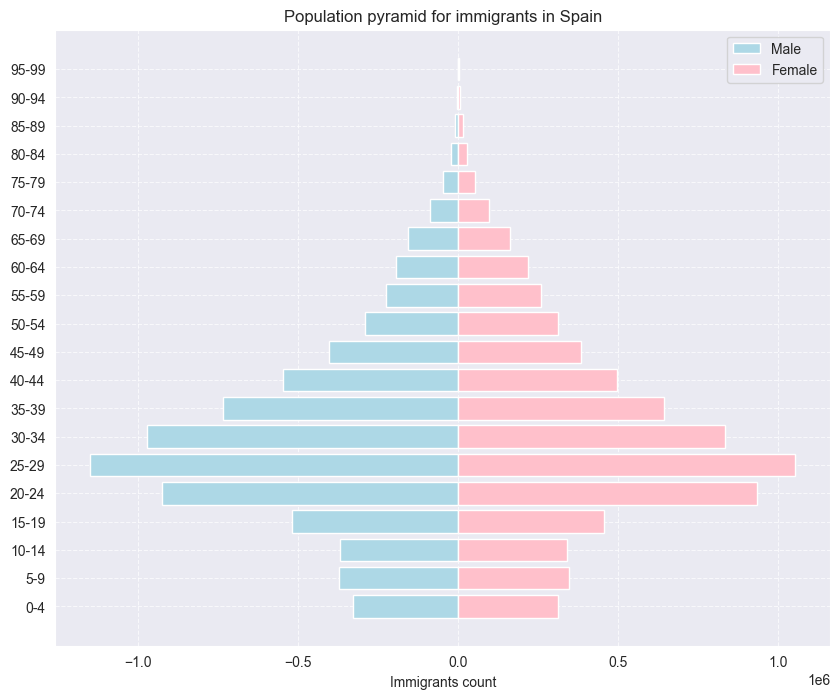

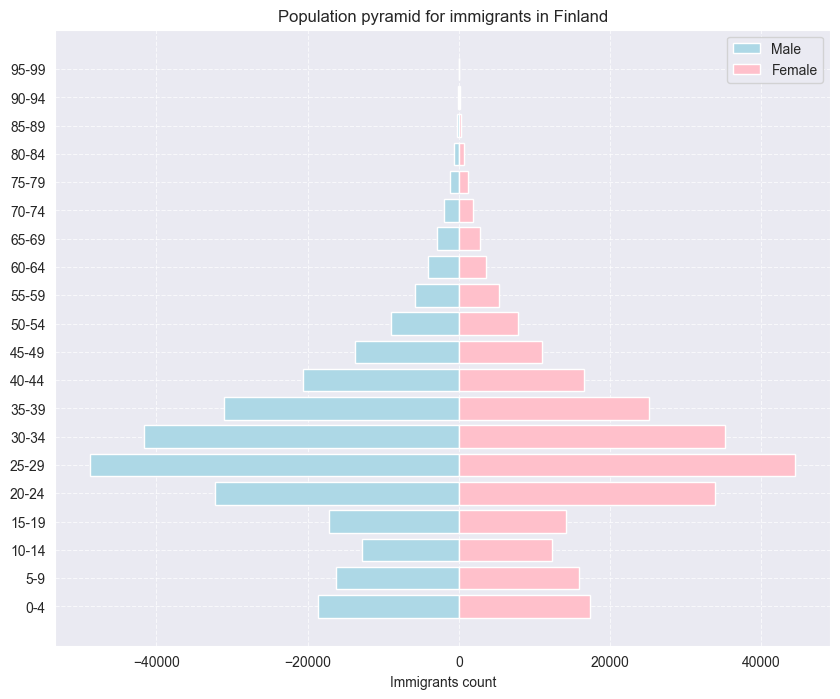

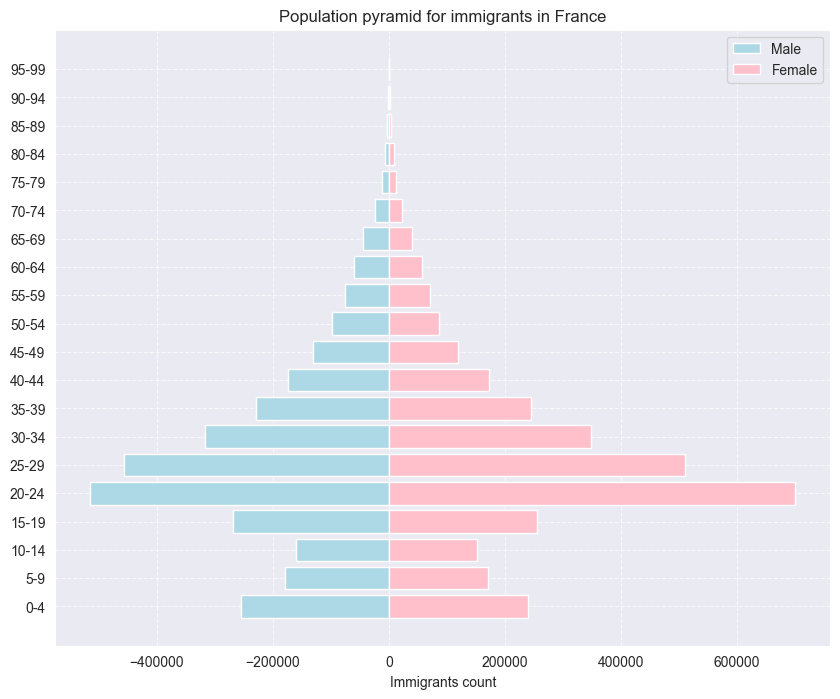

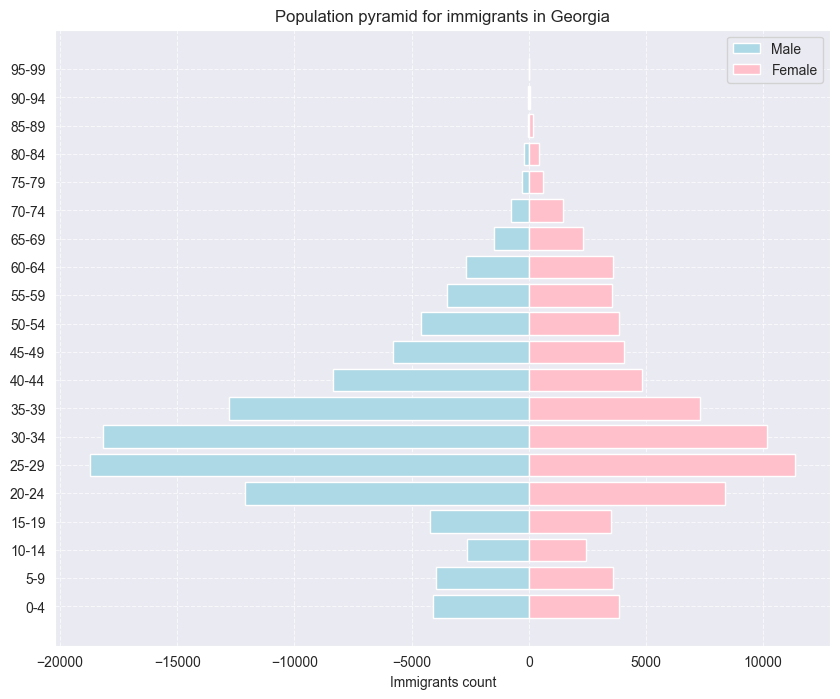

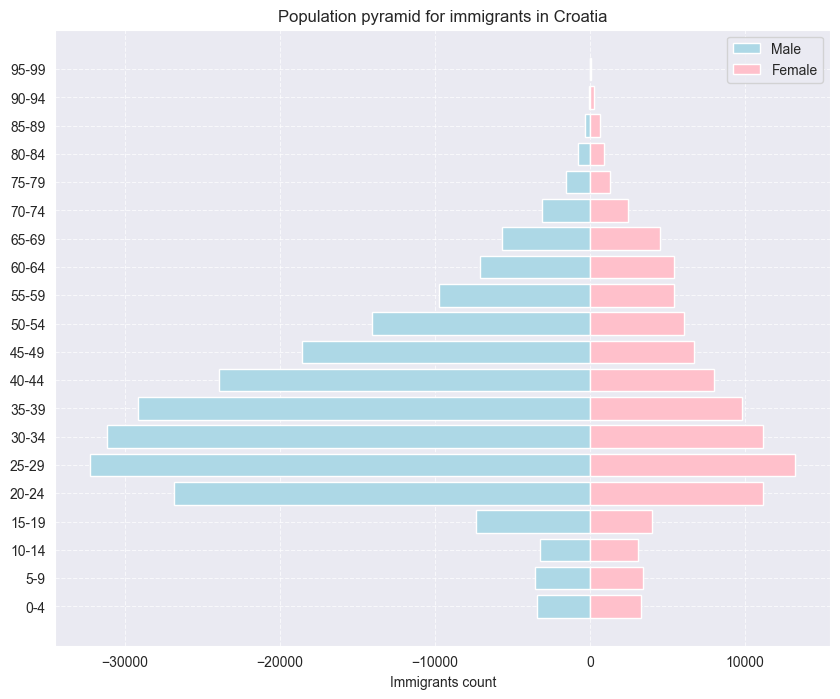

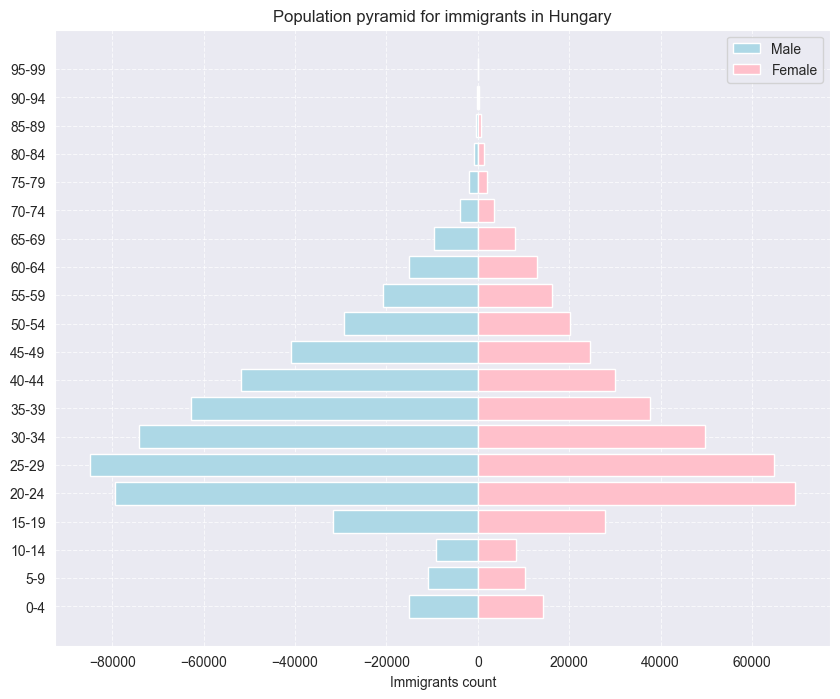

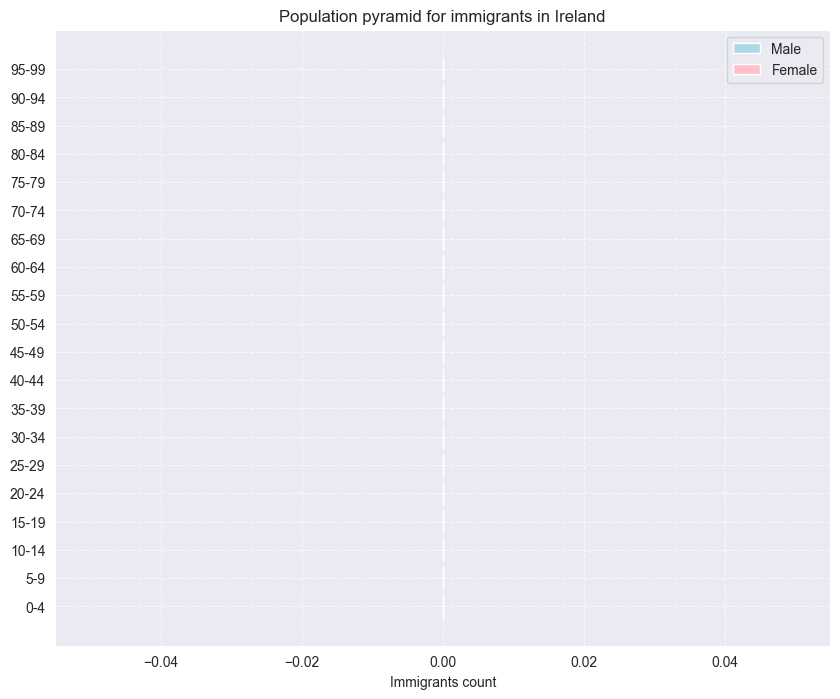

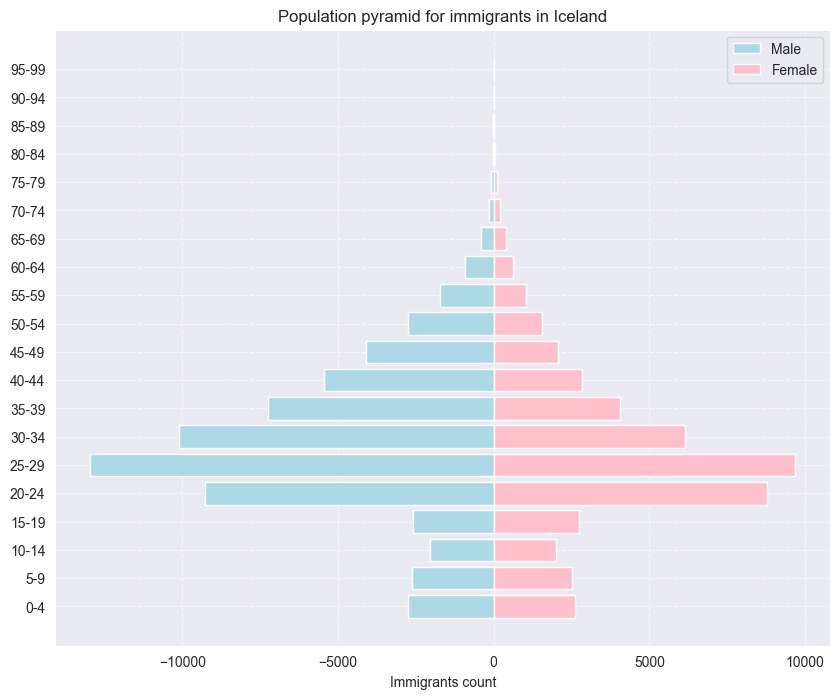

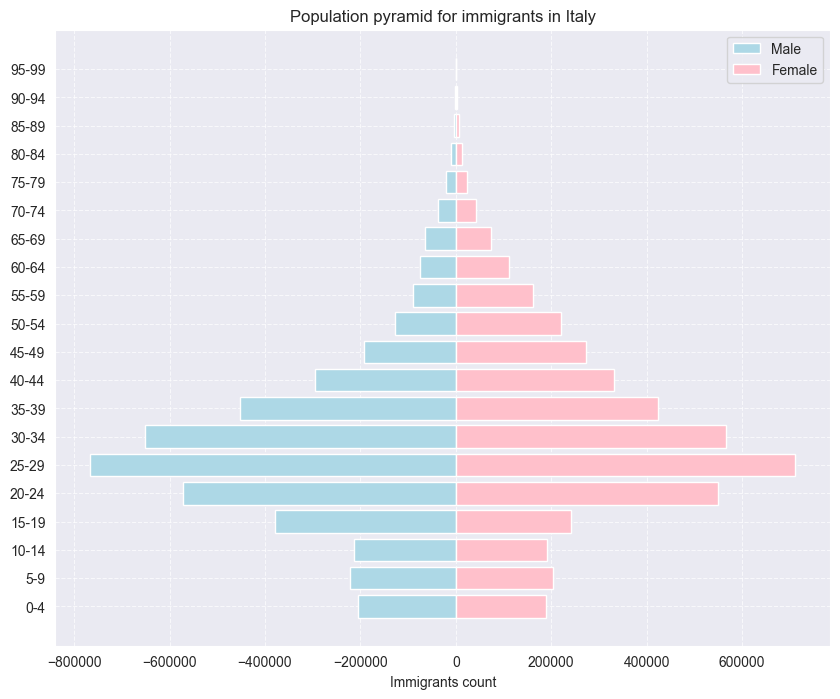

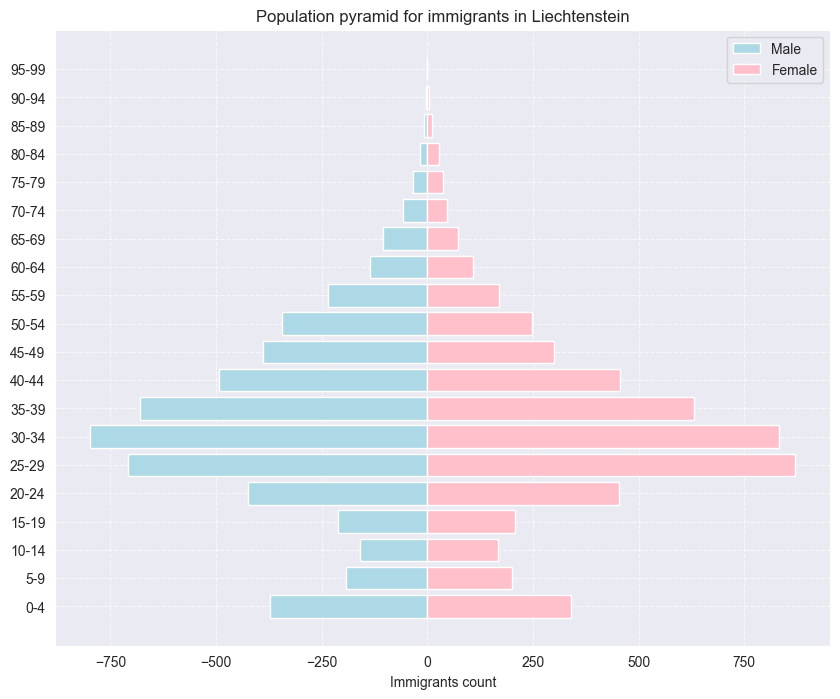

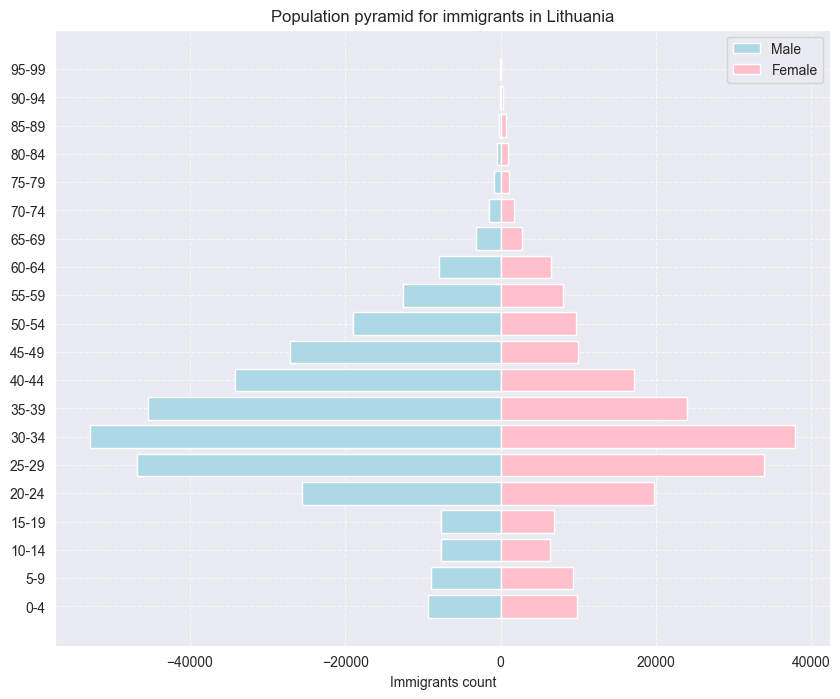

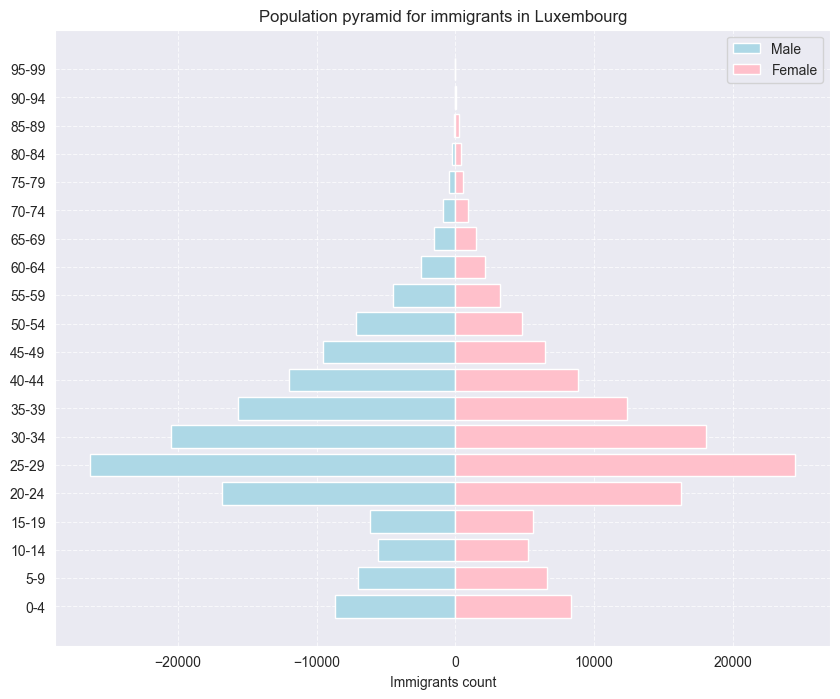

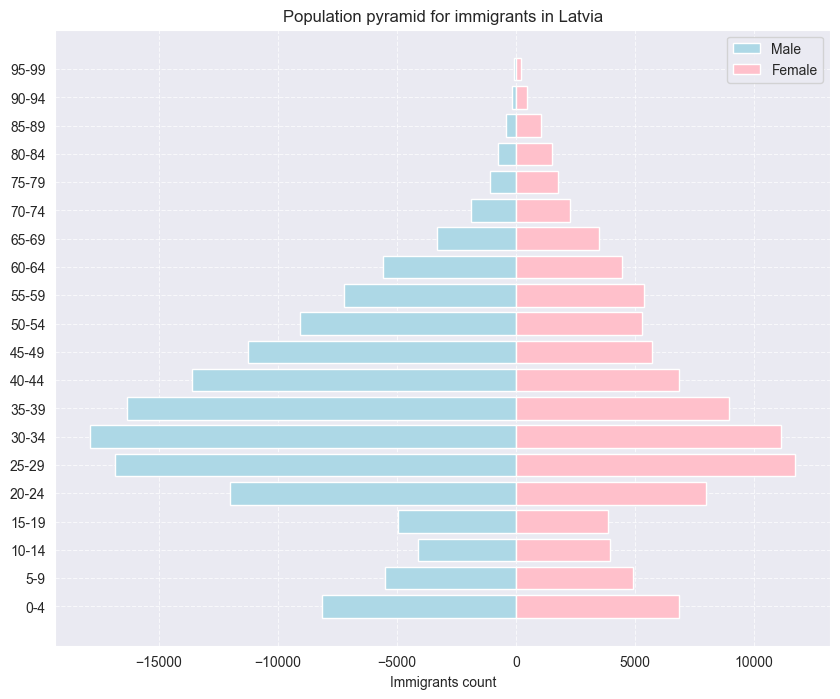

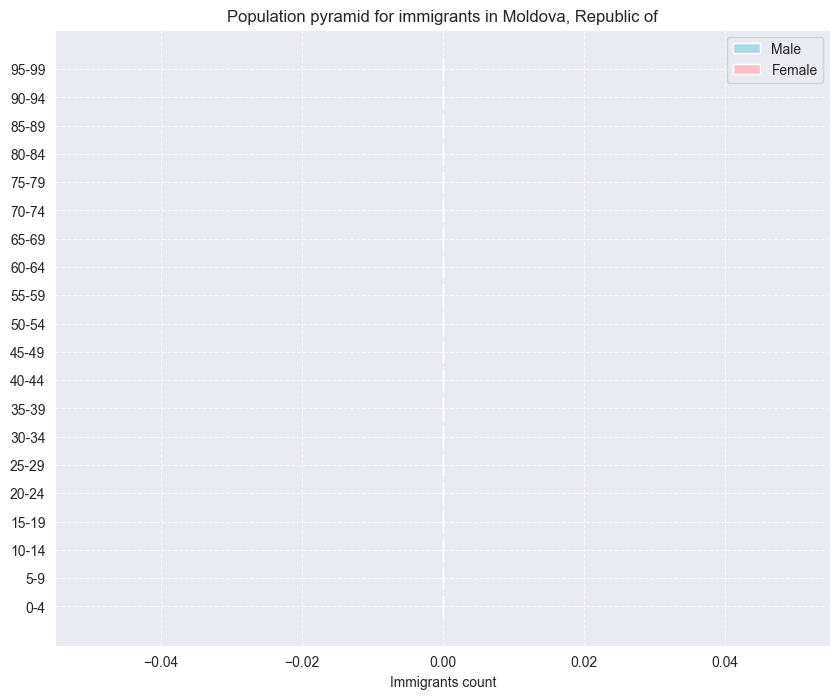

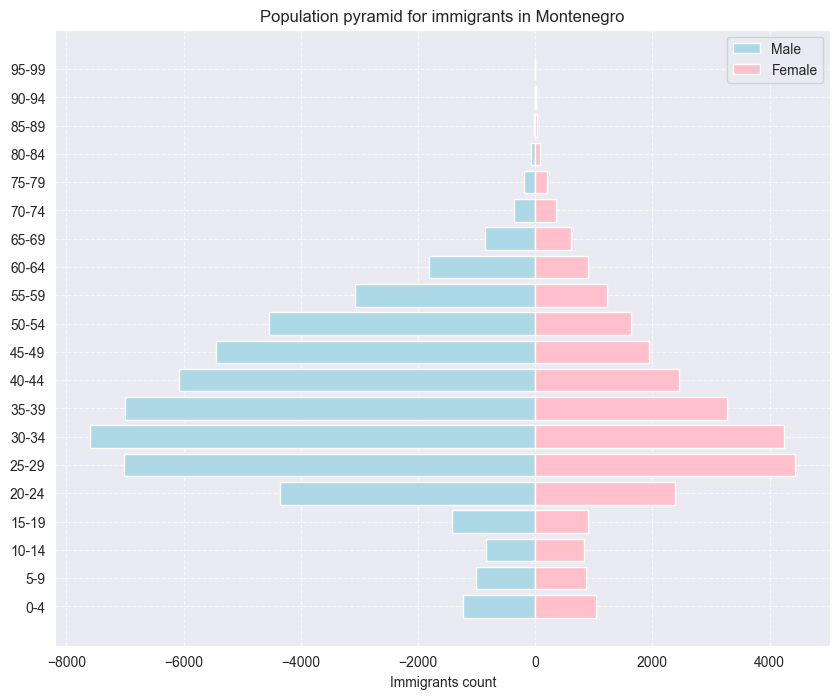

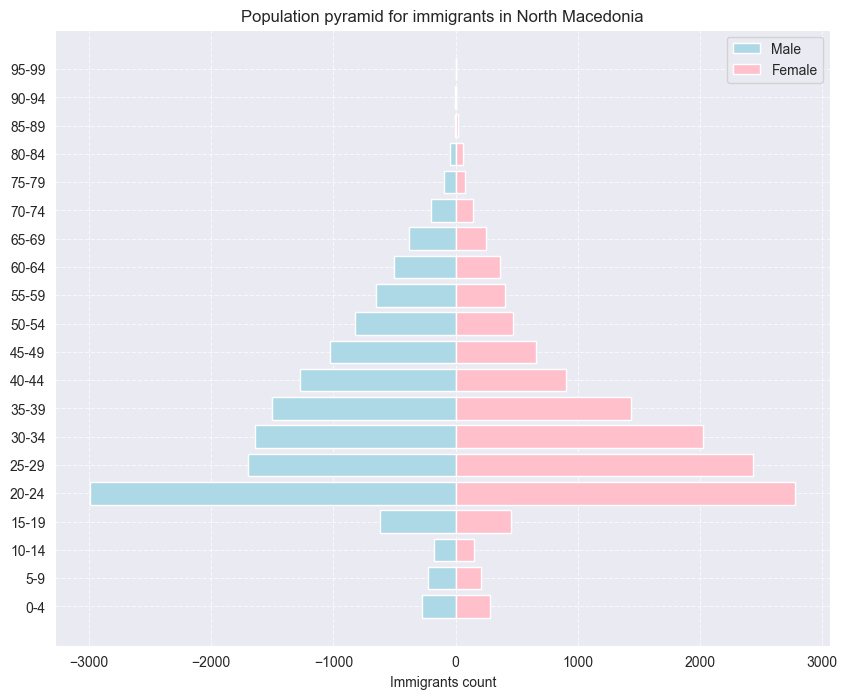

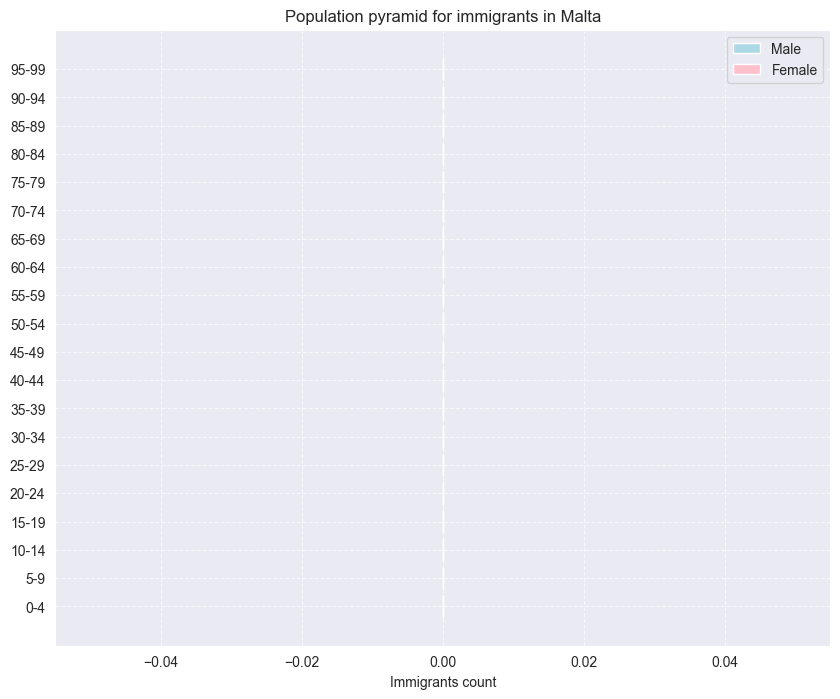

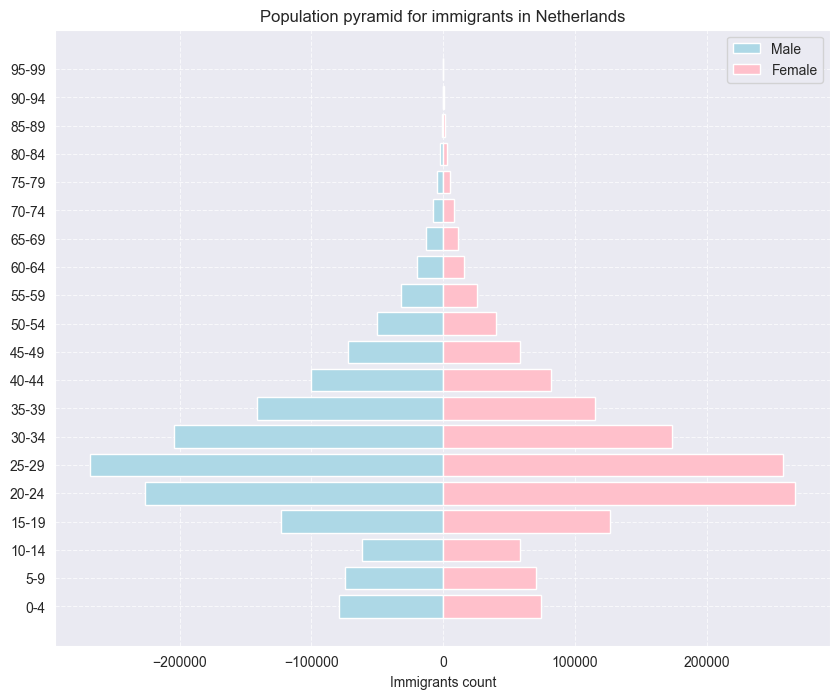

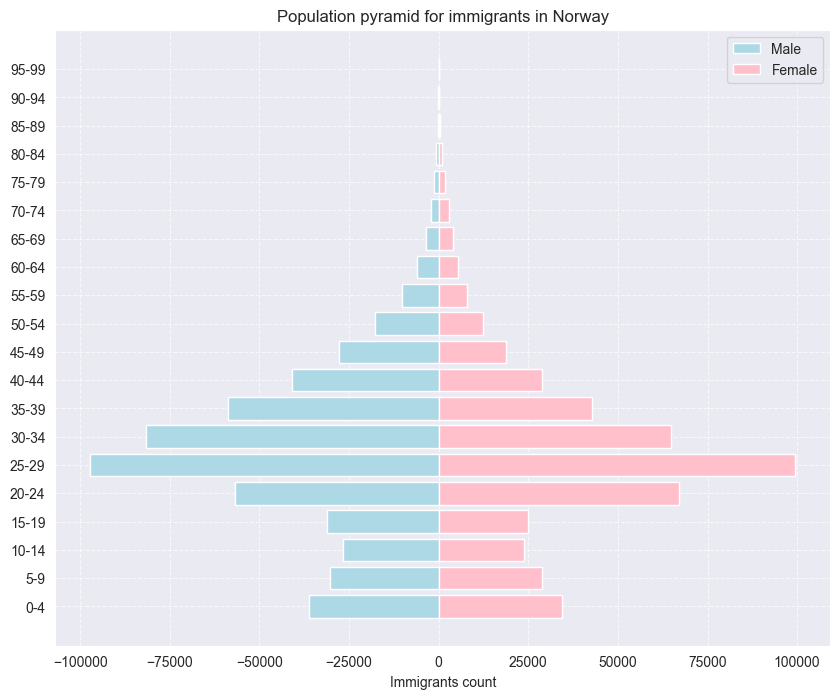

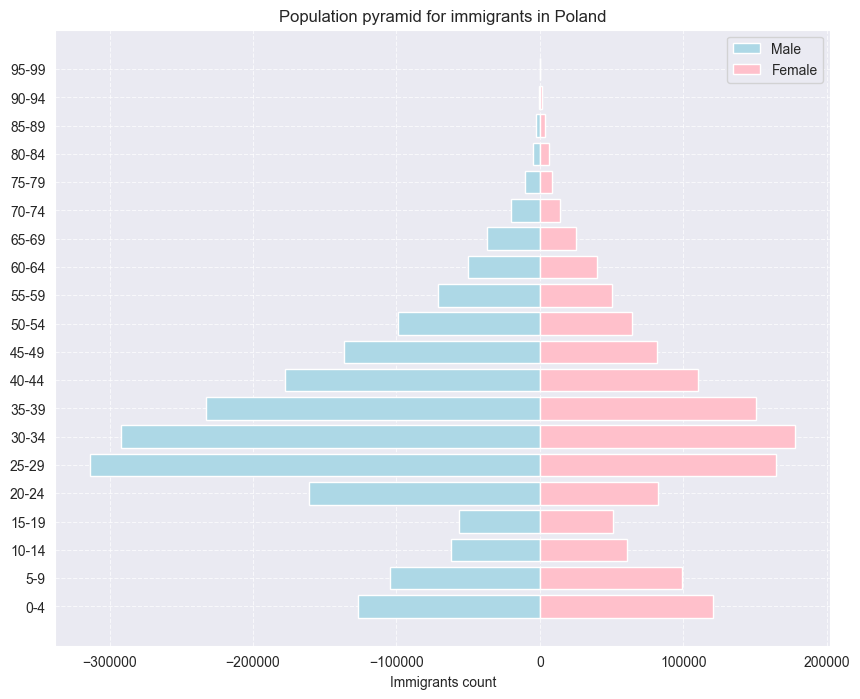

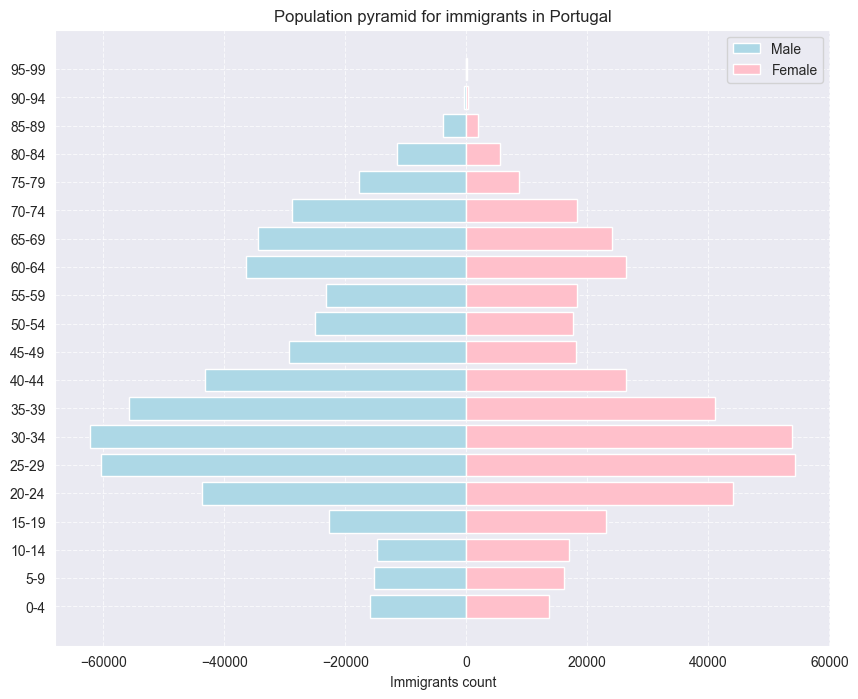

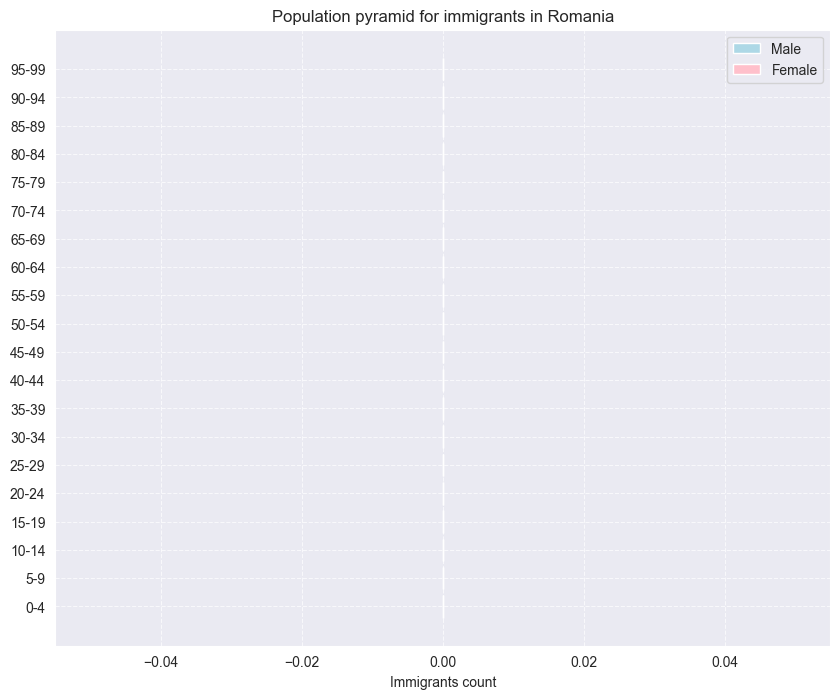

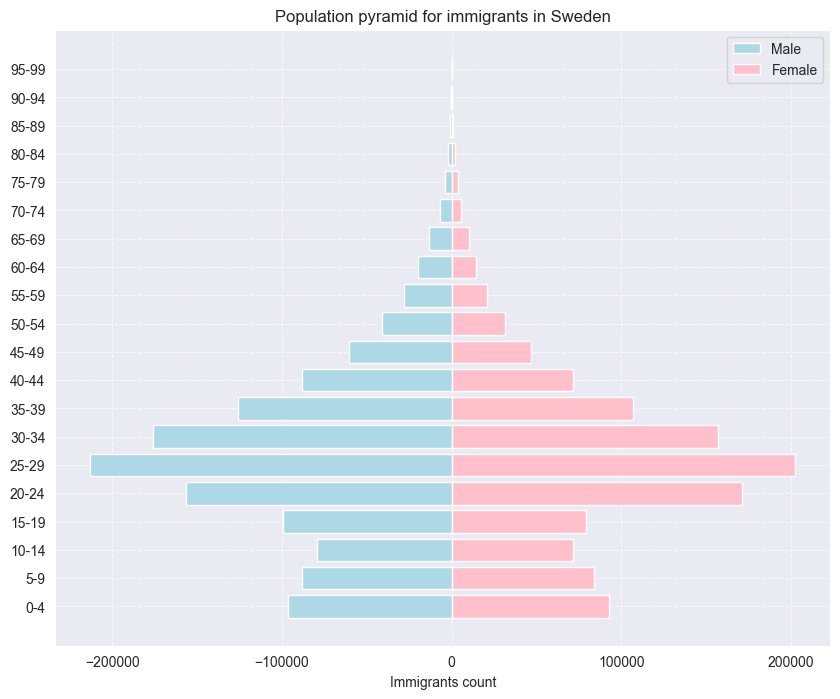

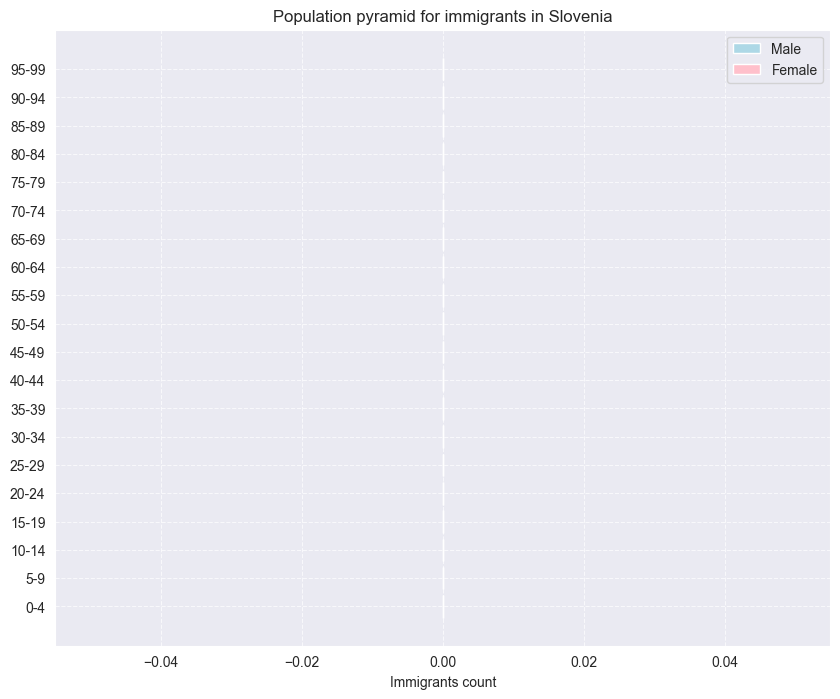

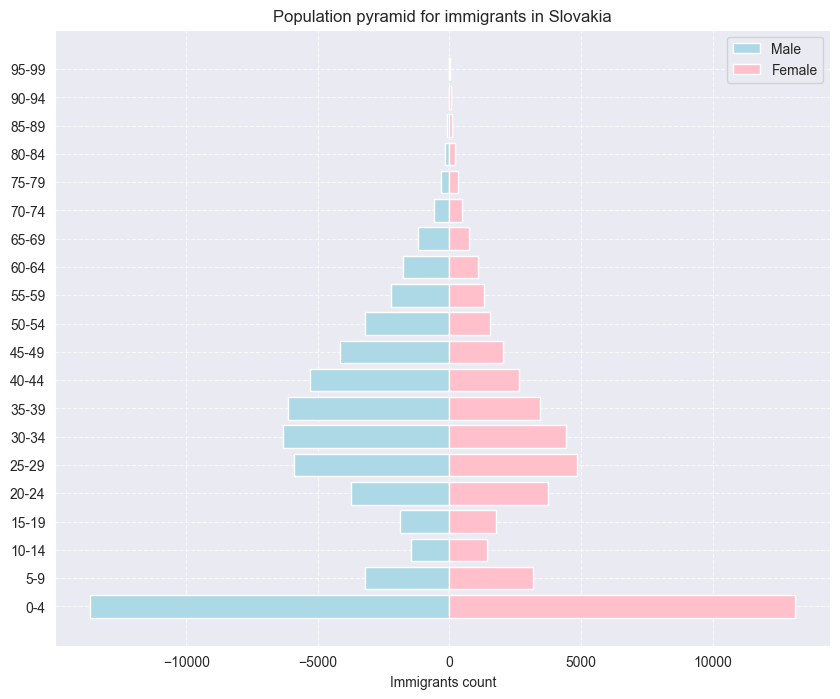

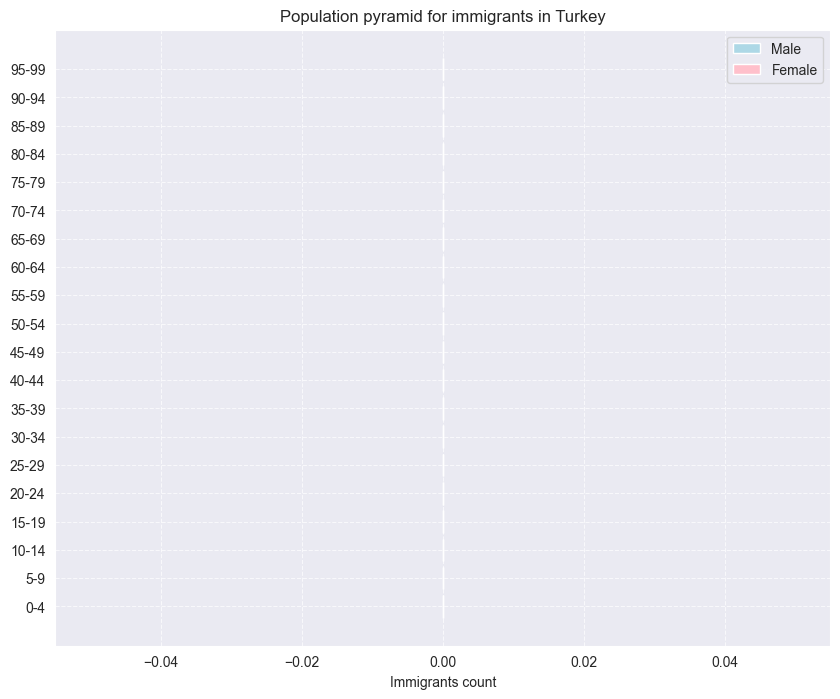

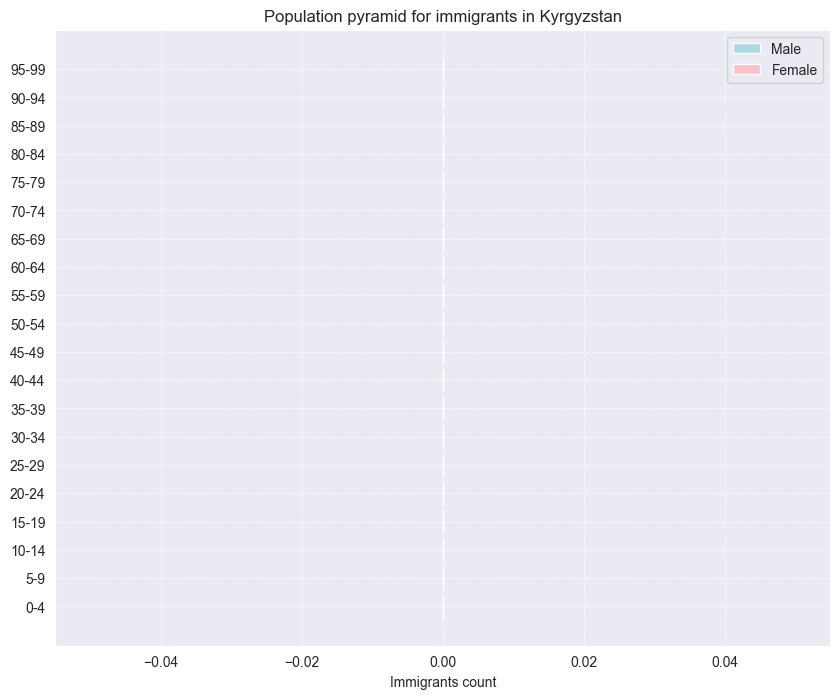

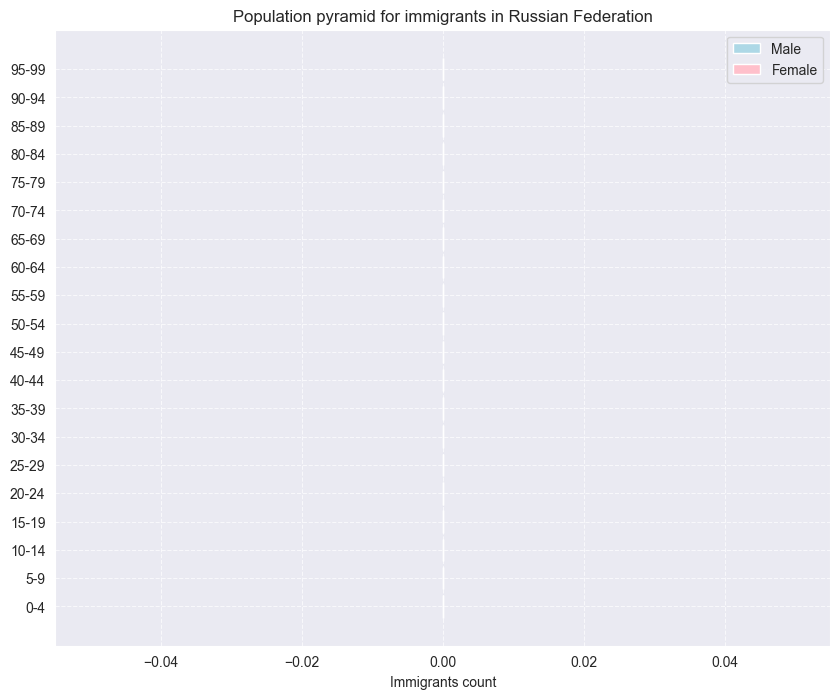

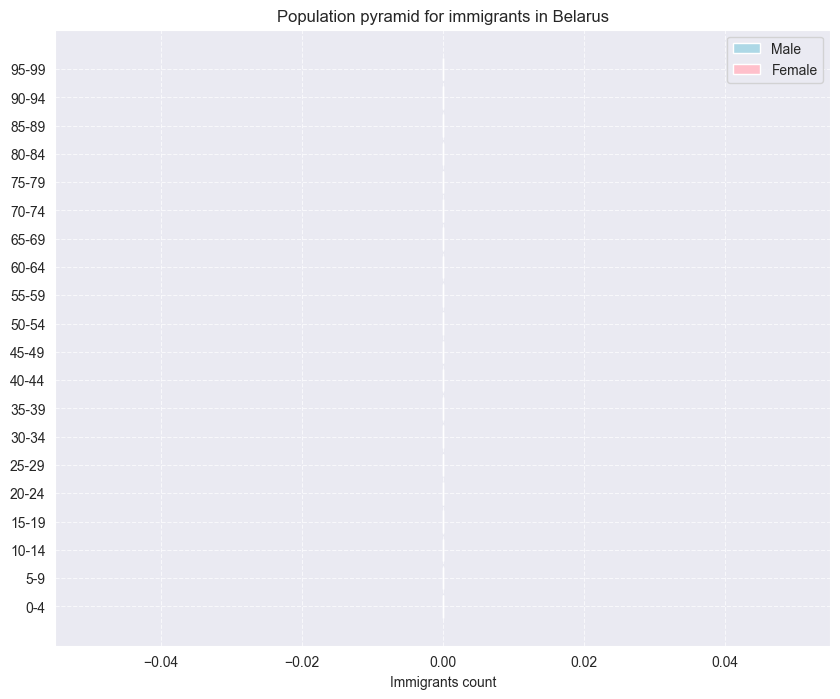

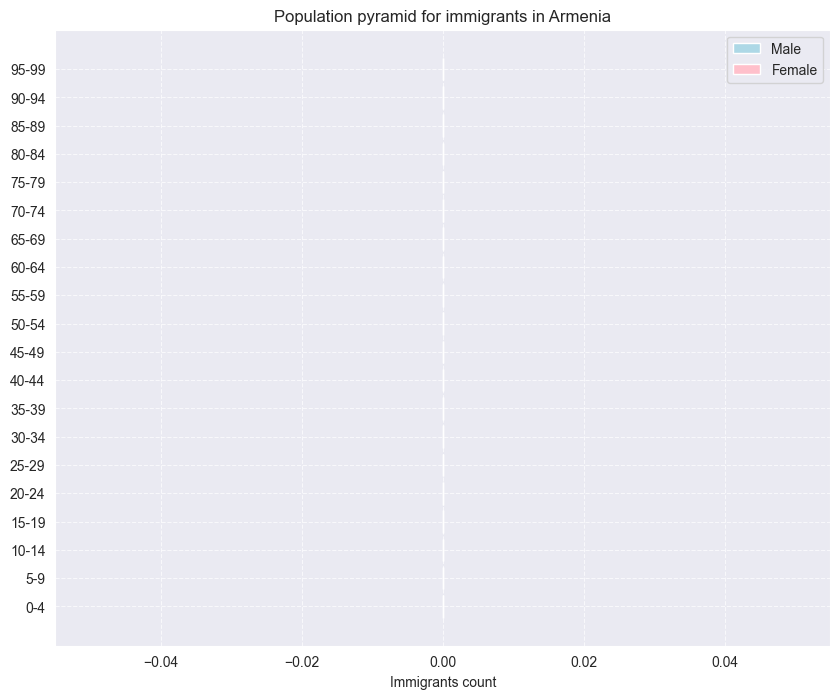

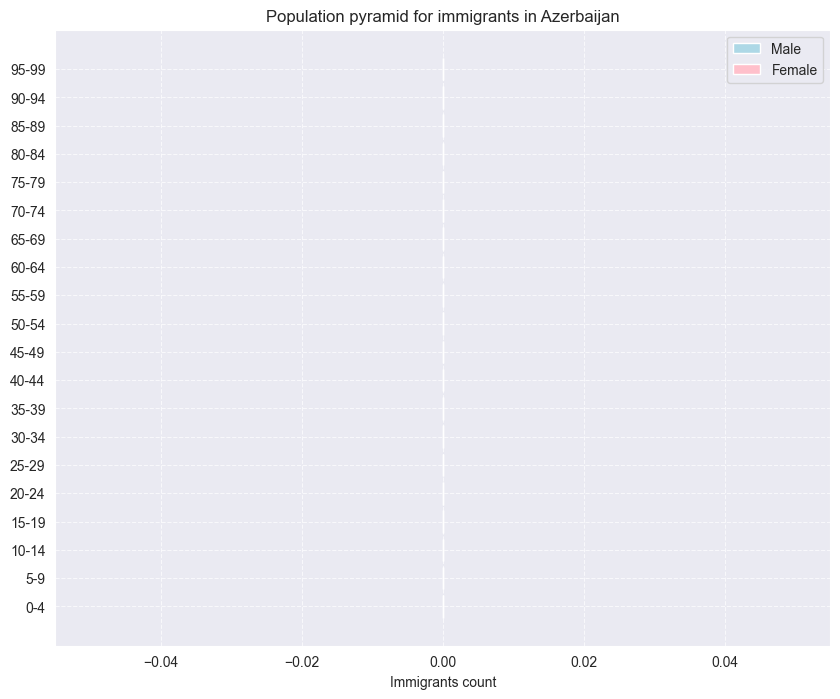

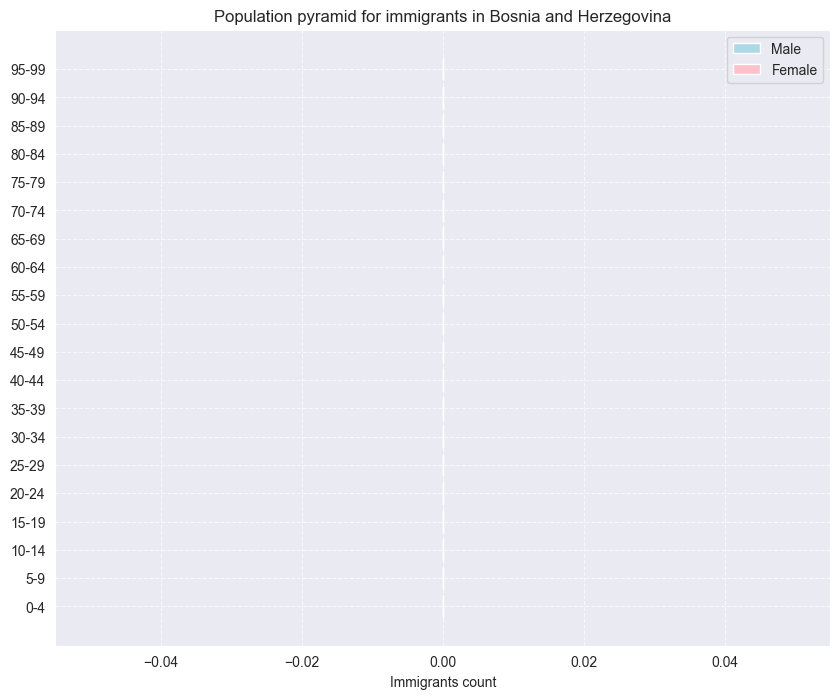

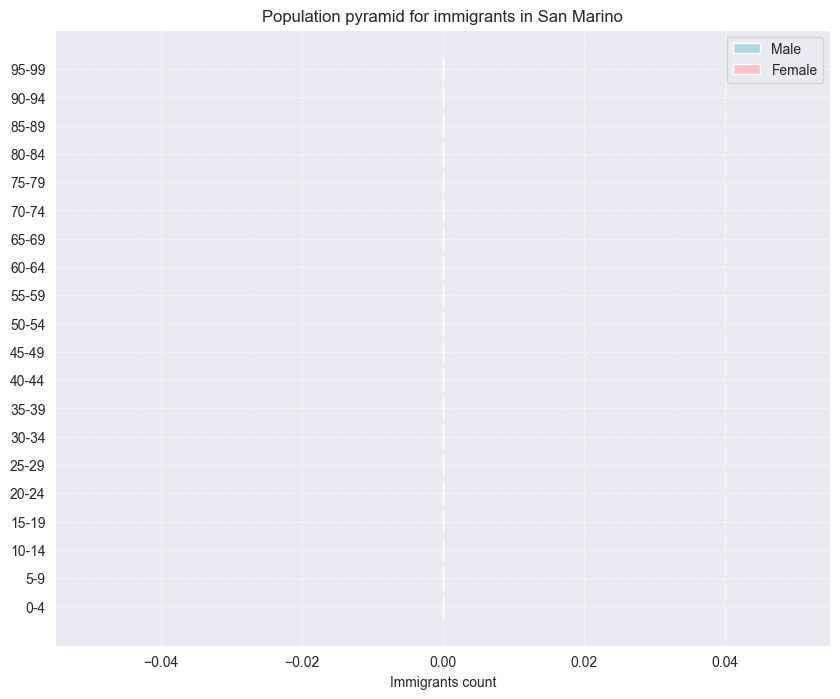

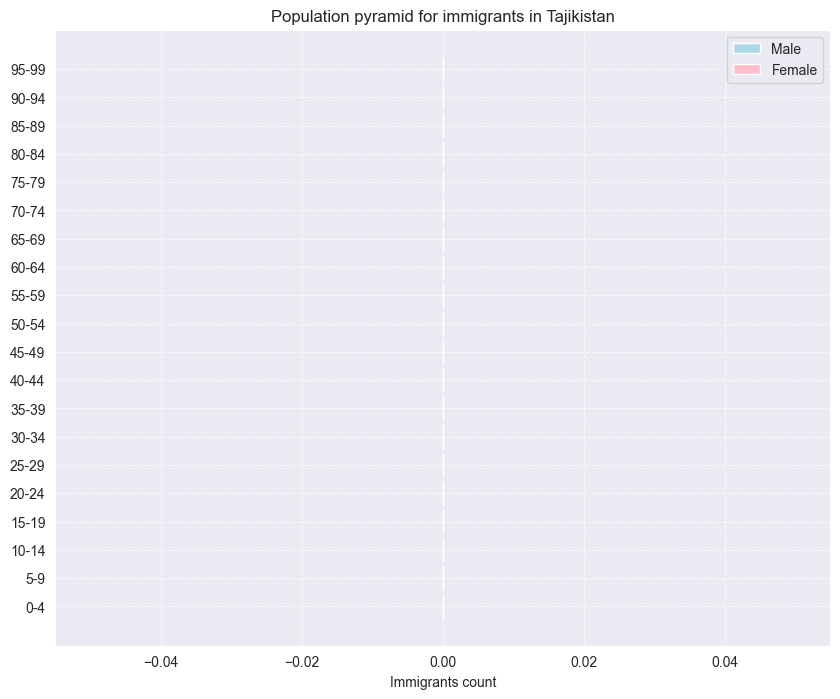

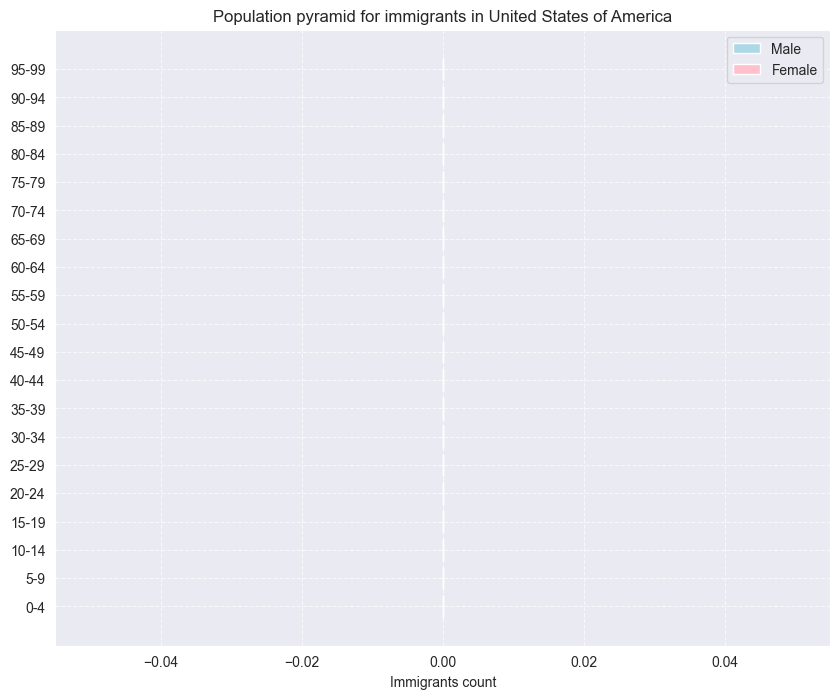

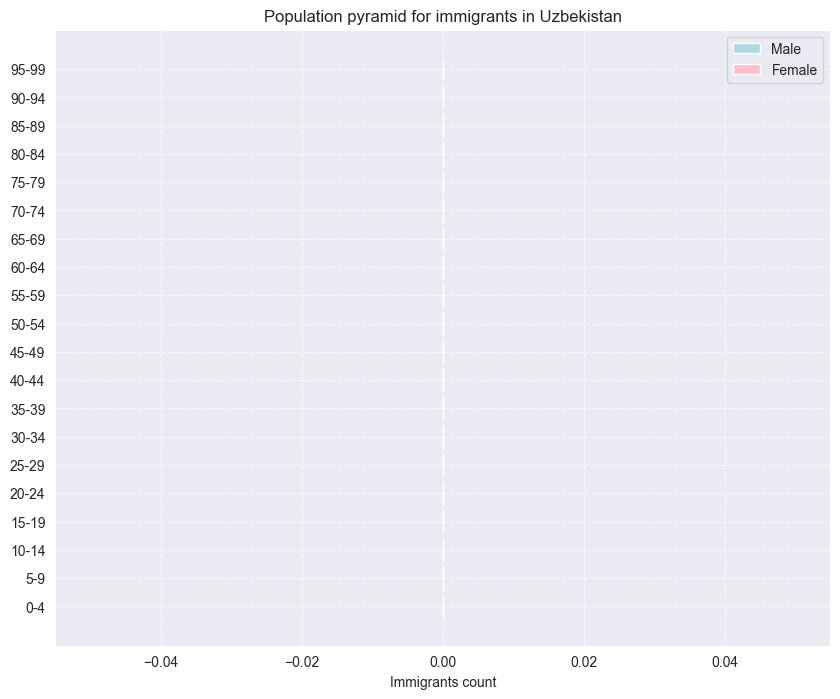

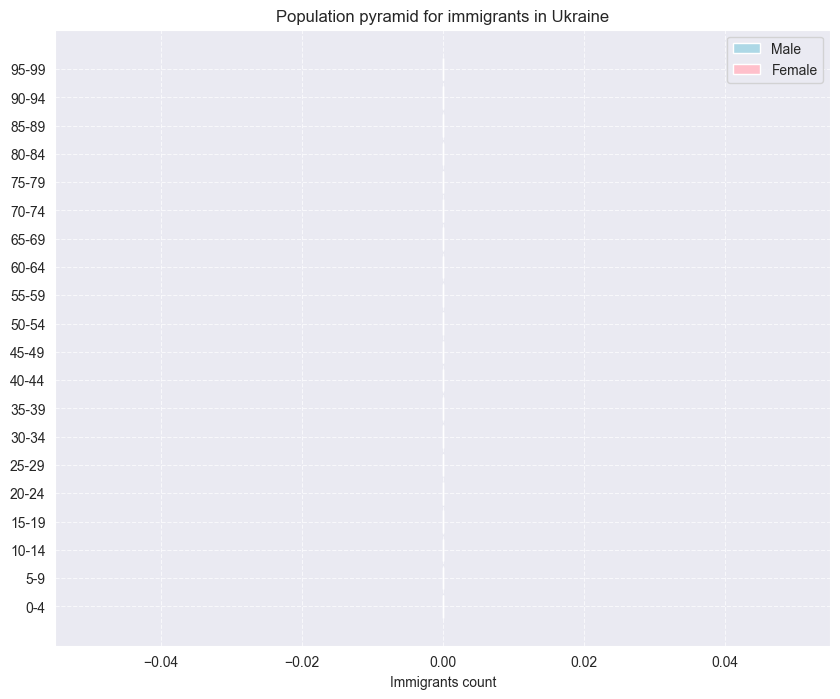

In [7]:
def country_immigration_pyramid(country):
    df = table.copy()
    df = df[(df['birth_country'] == 'TOTAL') & (df["agedef"] == "REACH")]
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    df = df.dropna(subset=['age'])
    country_data = df[df['Country'] == country].copy()

    try:
        bins = list(range(0, 101, 5))
        labels = [f'{bins[i]}-{bins[i + 1] - 1}' for i in range(len(bins) - 1)]

        country_data['age_group'] = pd.cut(country_data['age'], bins=bins, labels=labels, right=False)
        year_columns = [str(year) for year in range(1998, 2024)]

        country_data[year_columns] = country_data[year_columns].apply(pd.to_numeric, errors='coerce')

        age_totals = []
        for group in labels:
            group_data = country_data[country_data['age_group'] == group]
            male_data = group_data[group_data['sex'] == 'M'][year_columns].sum().sum()
            female_data = group_data[group_data['sex'] == 'F'][year_columns].sum().sum()
            if pd.notnull(male_data) and pd.notnull(female_data):
                age_totals.append((group, float(male_data), float(female_data)))

        if not age_totals:
            print(f"No valid data for {country}")
            return

        male_values = [-total[1] for total in age_totals]
        female_values = [total[2] for total in age_totals]
        y_positions = range(len(age_totals))
        labels = [total[0] for total in age_totals]

        fig, ax = plt.subplots(figsize=(10, 8))
        ax.barh(y_positions, male_values, align='center', color='lightblue', label='Male')
        ax.barh(y_positions, female_values, align='center', color='pink', label='Female')

        ax.set_yticks(y_positions)
        ax.set_yticklabels(labels)
        ax.set_xlabel('Immigrants count')
        ax.set_title(f'Population pyramid for immigrants in {country}')
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.7)

        max_value = max(max(abs(min(male_values))), max(female_values))
        ax.set_xlim(-max_value * 1.1, max_value * 1.1)

        ax.set_xticklabels([f'{abs(int(x)):,}' for x in ax.get_xticks()])

        plt.tight_layout()

        dir_name = os.path.join("../Images/Countries", country)
        os.makedirs(dir_name, exist_ok=True)

        file_path = os.path.join(dir_name, f"immigration_pyramid_{country.lower()}.png")
        # plt.savefig(file_path, bbox_inches='tight')
        # plt.close(fig)

    except Exception as e:
        print(f"Error processing {country}:", e)


for country in table['Country'].unique():
    country_immigration_pyramid(country)


## Age group immigration

In [ ]:
def country_immigration(country):
    df = table.copy()
    df = df[(df['birth_country'] == 'TOTAL') & (df["agedef"] == "COMPLET")]
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    df = df.dropna(subset=['age'])

    country_data = df[df['Country'] == country]
    try:
        age15 = country_data[(country_data['age'] <= 15) & (country_data['sex'] == 'T')]
        age26 = country_data[(country_data['age'] >= 16) & (country_data['age'] <= 26) & (country_data['sex'] == 'T')]
        age65 = country_data[(country_data['age'] >= 27) & (country_data['age'] <= 65) & (country_data['sex'] == 'T')]
        age100 = country_data[(country_data['age'] >= 66) & (country_data['sex'] == 'T')]

        if len(age15) == 0:
            print(f"No data found for {country} in 0-15 age category")
            return
        elif len(age26) == 0:
            print(f"No data found for {country} in 16-26 age category")
            return
        elif len(age65) == 0:
            print(f"No data found for {country} in 27-65 age category")
            return
        elif len(age100) == 0:
            print(f"No data found for {country} in 66+ age category")
            return

        years = list(range(1998, 2024))
        year_columns = [str(year) for year in years]

        values15 = []
        values26 = []
        values65 = []
        values100 = []
        total15 = 0
        total26 = 0
        total65 = 0
        total100 = 0

        for year in year_columns:
            # age <=15
            val15 = age15[year].iloc[0] if year in age15.columns else 0
            val15 = 0 if pd.isna(val15) else float(val15)
            values15.append(val15)
            total15 += val15

            # age 16-26
            val26 = age26[year].iloc[0] if year in age26.columns else 0
            val26 = 0 if pd.isna(val26) else float(val26)
            values26.append(val26)
            total26 += val26

            # age 26-65
            val65 = age65[year].iloc[0] if year in age65.columns else 0
            val65 = 0 if pd.isna(val65) else float(val65)
            values65.append(val65)
            total65 += val65

            # age 66+
            val100 = age100[year].iloc[0] if year in age100.columns else 0
            val100 = 0 if pd.isna(val100) else float(val100)
            values100.append(val100)
            total100 += val100

        stats_text = (
            f"Total immigration by age group in {country}: 0-15: {int(total15)} | 16-26: {int(total26)} | 27-65: {int(total65)} | 66+: {int(total100)}"
        )

        fig, ax = plt.subplots(figsize=(16, 10))
        plt.subplots_adjust(bottom=0.3)
        bar_width = 0.2

        r1 = np.arange(len(years))
        r2 = [x + bar_width for x in r1]
        r3 = [x + bar_width for x in r2]
        r4 = [x + bar_width for x in r3]

        ax.bar(r1, values15, width=bar_width, label="0-15 years", color="green")
        ax.bar(r2, values26, width=bar_width, label="16-26 years", color="blue")
        ax.bar(r3, values65, width=bar_width, label="27-65 years", color="red")
        ax.bar(r4, values100, width=bar_width, label="66+ years", color="orange")

        ax.set_xlabel('Year')
        ax.set_ylabel('Number of Immigrants')
        ax.set_title(f'Immigration to {country} by Age Group (1998-2023)')
        ax.set_xticks([r + bar_width*1.5 for r in range(len(years))])
        ax.set_xticklabels(years, rotation=45)
        ax.legend()
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        plt.figtext(0.5, 0.01, stats_text, ha='center', fontsize=18)
        plt.tight_layout()

        dir_name = os.path.join("../Images/Countries", country)
        os.makedirs(dir_name, exist_ok=True)

        file_path = os.path.join(dir_name, f"age_groups_immigration_{country.lower()}.png")
        plt.savefig(file_path)
        plt.close()

    except Exception as e:
        print(f"Error processing {country}: {str(e)}")

# Process all countries
for country in table['Country'].unique():
    country_immigration(country)